# Proyecto: Métodos de minería de datos en Python
  
por: 
* María Paula Vargas R
* Jeisson F Castañeda G
  
16 de septiembre de 2021  
## Datos  
La base de datos fue tomada de la página de datos abiertos de Colombia (https://www.datos.gov.co/Educaci-n/PROGRAMAS-DE-EDUCACI-N-SUPERIOR/upr9-nkiz), los cuales fueron actualizados por última vez el 9 de diciembre de 2019 y creados el 14 de julio de 2016 por el Ministerio de Educación Nacional.  
La base contiene información de los  los programas de educación superior del país. Se compone de 86.722 filas (programas) y 41 columnas (caracteristicas)  
## Minería de datos.  
El objetivo es detectar anomalías en el tiempo de duración de los programas. En este que caso es un problema de aprendizaje supervisado debido a que los datos ya tienen etiquetas establecidas, las cuales se utilizaran para la detección. Además, el tamaño de la base dificulta la observación de estos datos y la clasificación que se realice debe ser capaz de identificar las anomalías.  
Una posible solución es mediante visualización de datos para observar los posibles datos atípicos que gráficamente se encuentran alejados.  
Otra posible solución es mediante el método k vecinos más cercanos. El supuesto fundamental en el del vecino más cercano es que las observaciones similares están próximas entre sí y los valores atípicos suelen ser observaciones alejadas.  
## Selección de varibles 
Para la selección de variables, inicialmente no se tuvieron en cuenta las variables de identificación, las variables de fecha y aquellas variables que tienen gran cantidad de categorías como el nombre de la institución, municipio, entre otras.  
Se eligieron las variables que se consideraron más relevantes para para lograr el objetivo, como el carácter de la institución (Universidad, técnica, técnica profesional, …), programas activos, área de conocimiento, metodología (presencial, virtual, a distancia, …), nivel académico (posgrado o pregrado), periodicidad (semestral, mensual, …) y la cantidad de periodos.
 
  

In [ ]:
#librerias
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Carga de datos
datos=pd.read_csv('/content/PROGRAMAS_DE_EDUCACI_N_SUPERIOR.csv', sep = ',')
datos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


codigoinstitucion  ... VALOR_MATRICULA_2019
0                   2747  ...                  NaN
1                   1101  ...                  NaN
2                   1101  ...                  NaN
3                   1101  ...                  NaN
4                   1101  ...                  NaN
...                  ...  ...                  ...
86717               1801  ...                  NaN
86718               1206  ...                  NaN
86719               1713  ...                  NaN
86720               1831  ...                  NaN
86721               9110  ...                  NaN

[86722 rows x 41 columns]

In [ ]:
datos["nombreinstitucion"].value_counts()

SERVICIO NACIONAL DE APRENDIZAJE-SENA-                                                         11905
UNIVERSIDAD DE ANTIOQUIA                                                                        2908
UNIVERSIDAD COOPERATIVA DE COLOMBIA                                                             2455
UNIVERSIDAD NACIONAL DE COLOMBIA                                                                1707
UNIVERSIDAD DEL VALLE                                                                           1591
                                                                                               ...  
ESCUELA SUPERIOR DE OFTALMOLOGIA, INSTITUTO BARRAQUER DE AMERICA                                   2
INSTITUTO UNIVERSITARIO DE HISTORIA DE COLOMBIA                                                    2
FUNDACION UNIVERSITARIA ESCUELA COLOMBIANA DE MEDICINA HOMEOPATICA &QUOT;LUIS G. PAEZ&QUOT;        2
ESCUELA SUPERIOR DE OFTALMOLOGIA INSTITUTO BARRAQUER DE AMERICA                            

In [ ]:
datos["nombredepartinstitucion"].value_counts()

BOGOTA D.C                  38652
ANTIOQUIA                   13704
VALLE DEL CAUCA              5529
SANTANDER                    4618
ATLANTICO                    4192
BOLIVAR                      2409
CALDAS                       2237
BOYACA                       1567
NORTE DE SANTANDER           1541
TOLIMA                       1459
CAUCA                        1444
RISARALDA                    1336
CUNDINAMARCA                 1007
MAGDALENA                     893
CORDOBA                       871
NARIÑO                        804
QUINDIO                       722
SUCRE                         702
HUILA                         667
META                          405
GUAJIRA                       363
CHOCO                         345
NARINIO                       324
CESAR                         290
CAQUETA                       258
PUTUMAYO                      155
CASANARE                      101
SAN ANDRES Y PROVIDENCIA       88
ARAUCA                         21
AMAZONAS      

In [ ]:
datos["nombremunicipioinstitucion"].value_counts()

BOGOTA D.C.       38652
MEDELLIN          11692
CALI               4759
BARRANQUILLA       4126
BUCARAMANGA        3921
                  ...  
COVEAS (SUCRE)       13
LA PAZ               12
MARINILLA             6
CERETE                4
COPACABANA            4
Name: nombremunicipioinstitucion, Length: 79, dtype: int64

In [ ]:
datos["nombreorigeninstitucional"].value_counts()

Pirivada    36186
Publica     29044
PRIVADA     14365
OFICIAL      7127
Name: nombreorigeninstitucional, dtype: int64

In [ ]:
datos["nombrecaracteracademico"].value_counts()

Universidad                                      34958
Institución Tecnológica                          14538
UNIVERSIDAD                                      13839
Institución Universitaria/Escuela Tecnológica    13044
INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA     4632
Institución Técnica Profesional                   2690
INSTITUCION TECNOLOGICA                           2030
INSTITUCION TECNICA PROFESIONAL                    991
Name: nombrecaracteracademico, dtype: int64

In [ ]:
datos["nombreareaconocimiento"].value_counts()

Economía, administración, contaduría y afines    20548
Ingeniería, arquitectura, urbanismo y afines     16490
Ciencias sociales y humanas                       8572
Ciencias de la educación                          7034
ECONOMIA ADMINISTRACION CONTADURIA Y AFINES       6642
INGENIERIA ARQUITECTURA URBANISMO Y AFINES        4945
Ciencias de la salud                              4802
CIENCIAS SOCIALES Y HUMANAS                       3402
Agronomía veterinaria y afines                    3362
Bellas artes                                      2746
CIENCIAS DE LA EDUCACION                          2625
CIENCIAS DE LA SALUD                              1831
Matemáticas y ciencias naturales                  1676
BELLAS ARTES                                       895
MATEMATICAS Y CIENCIAS NATURALES                   591
AGRONOMIA VETERINARIA Y AFINES                     561
Name: nombreareaconocimiento, dtype: int64

In [ ]:
datos["nombreprograma"].value_counts()

ADMINISTRACION DE EMPRESAS                                                                       1275
CONTADURIA PUBLICA                                                                               1127
DERECHO                                                                                           893
INGENIERIA DE SISTEMAS                                                                            844
INGENIERIA INDUSTRIAL                                                                             586
                                                                                                 ... 
ESPECIALIZACION EN DERECHO PRIVADO ECONOMICO                                                        1
TECNOLOG¿A EN GESTI¿N DE AGROINDUSTRIAS ALIMENTICIAS                                                1
TECNOLOGIA EN DISE¿O DE ELEMENTOS MECANICOS PARA SU FABRICACION CON MAQUINAS HERRAMIENTAS CNC       1
MAESTR¿A EN CIENCIAS QU¿MICAS                                                     

In [ ]:
datos["nombreestadoprograma"].value_counts()

ACTIVO      49901
INACTIVO    36821
Name: nombreestadoprograma, dtype: int64

In [ ]:
datos["nombremetodologia"].value_counts()

Presencial                 59044
PRESENCIAL                 19854
Distancia (tradicional)     4420
Distancia (virtual)         1766
DISTANCIA (TRADICIONAL)     1045
VIRTUAL                      593
Name: nombremetodologia, dtype: int64

In [ ]:
datos["nombrenivelacademico"].value_counts()

Pregrado    42132
Posgrado    23098
PREGRADO    12507
POSGRADO     8985
Name: nombrenivelacademico, dtype: int64

In [ ]:
datos["nombreperiodicidad"].value_counts()

SEMESTRAL        65860
MENSUAL          10215
ANUAL             5252
TRIMESTRAL        2588
CUATRIMESTRAL     1065
SIN DEFINIR       1055
PERIODOS           118
BIMENSUAL           40
POR COHORTE          3
Name: nombreperiodicidad, dtype: int64

In [ ]:
datos["codigoperiodicidad"].value_counts()

2    65860
8    10215
1     5252
3     2588
5     1065
6     1055
9      644
4       40
7        3
Name: codigoperiodicidad, dtype: int64

Según la información obtenida, el departamento del Amazonas es el que menos instituciones de educación superior posee. Por tanto, y al tener en cuenta que es uno de los departamentos más vulnerables del país, se realizó un análisis para saber con exactitud de qué origen son las pocas instituciones con las que cuenta, es decir, públicas o privadas. De esta manera, se afirma que las 18 instituciones con las que cuenta el departamento de Amazonas son de origen público.

Las instituciones privadas en el departamento del Amazonas son: 0
Las instituciones publicas en el departamento del Amazonas son: 12


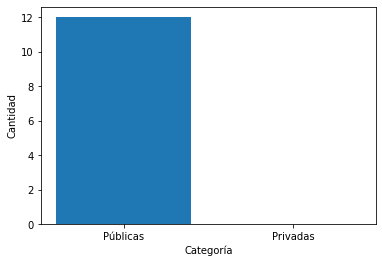

In [ ]:
amazonas=0;
pub=0;
priv=0;

for i in range(86722):
  if datos['nombredepartinstitucion'][i]=="AMAZONAS":
    amazonas=amazonas+1;
    if datos['nombreorigeninstitucional'][i]=='Pirivada'and'PRIVADA':
      priv=priv+1;
    if datos['nombreorigeninstitucional'][i]=='Publica':
      pub=pub+1;

print('Las instituciones privadas en el departamento del Amazonas son:',priv)
print('Las instituciones publicas en el departamento del Amazonas son:',pub)

eje_x = ['Públicas', 'Privadas']
eje_y=[pub,priv]
plt.bar(eje_x, eje_y)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()



Por otro lado, la ciudad predominante en cuanto a instituciones de educación superioir fue la capital de país. 

Las instituciones privadas en Bogotá son: 16578
Las instituciones publicas en Bogotá son:: 13998


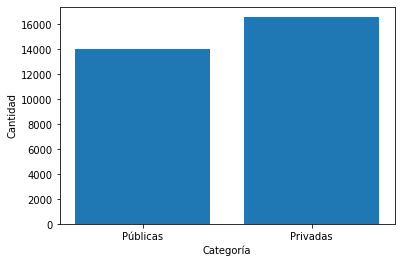

In [ ]:
bogota=0;
pub=0;
priv=0;

for i in range(86722):
  if datos['nombredepartinstitucion'][i]=="BOGOTA D.C":
    bogota=bogota+1;
    if datos['nombreorigeninstitucional'][i]=='Pirivada'and'PRIVADA':
      priv=priv+1;
    if datos['nombreorigeninstitucional'][i]=='Publica':
      pub=pub+1;

print('Las instituciones privadas en Bogotá son:',priv)
print('Las instituciones publicas en Bogotá son::',pub)

eje_x = ['Públicas', 'Privadas']
eje_y=[pub,priv]
plt.bar(eje_x, eje_y)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.show()


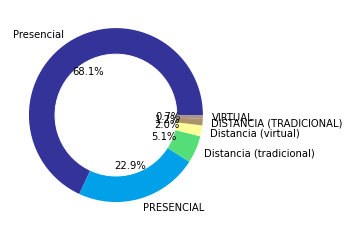

In [ ]:
from matplotlib import cm
tab4 = datos['nombremetodologia'].value_counts().rename_axis('label').reset_index(name='counts')
n = len(tab4['counts'])
colors = [cm.terrain(i / n) for i in range(n)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(tab4['counts'], labels=tab4['label'], colors = colors, autopct='%1.1f%%',startangle=0)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
]